#Introduzione

Banca Virtuosa, istituto di riferimento nel settore finanziario, ha identificato l'esigenza di migliorare la trasparenza e la comprensibilità dei modelli di intelligenza artificiale utilizzati nei propri sistemi. Per raggiungere questo obiettivo, Banca Virtuosa ha lanciato un progetto mirato all'implementazione di tecniche di Explainable AI (XAI), in conformità con la normativa vigente sulla trasparenza bancaria.

Attualmente, Banca Virtuosa utilizza modelli di classificazione pre-addestrati per analizzare e classificare dati finanziari critici. Tuttavia, la mancanza di trasparenza nelle decisioni di questi modelli può compromettere la fiducia dei clienti e limitare la capacità della banca di migliorare i propri sistemi in modo mirato. Identificare e correggere gli errori di classificazione è cruciale per garantire accuratezza e affidabilità nei servizi offerti.

**Benefici della Soluzione**

1. Trasparenza nelle Decisioni del Modello: Implementando tecniche di XAI come Grad-CAM, LIME, SHAP, Integrated Gradients e Occlusion Maps, Banca Virtuosa sarà in grado di generare mappe di salienza che mostrano visivamente quali elementi influenzano le decisioni del modello. Questo incremento di trasparenza migliorerà la fiducia dei clienti e degli stakeholder, dimostrando l'affidabilità e la spiegabilità delle operazioni del sistema di classificazione.
2. Miglioramento Continuo delle Performance: Analizzando le mappe di salienza, Banca Virtuosa potrà identificare con precisione le aree in cui il modello commette errori, sia nelle classificazioni corrette che in quelle errate. Questa analisi dettagliata permetterà di apportare miglioramenti mirati al modello, ottimizzando le sue performance e riducendo il rischio di interpretazioni errate dei dati.
3. Conformità Normativa: Il progetto garantirà che le decisioni dei modelli di intelligenza artificiale siano spiegabili, in linea con i requisiti normativi vigenti. La trasparenza delle decisioni AI è essenziale per la conformità normativa e la governance aziendale, particolarmente in settori regolamentati come quello finanziario.
4. Promozione dell'Innovazione: L'utilizzo di tecniche avanzate di XAI all'interno di Banca Virtuosa promuoverà l'innovazione nel campo dell'intelligenza artificiale. Questo rafforzerà la posizione della banca come pioniere nell'adozione di tecnologie avanzate, consentendo di offrire ai clienti soluzioni sempre più sofisticate e affidabili.

**Dettagli del Progetto**

- **Fase 1**: Utilizzo di un Modello di Classificazione Pre-Addestrato
 - ***Modello***: Utilizzare un modello pre-addestrato, come DenseNet, dalla libreria torchvision.
 - ***Dataset***: Applicare il modello a un dataset di immagini, ad esempio MNIST, per esplorare le sue decisioni di classificazione.
- **Fase 2**: Generazione di Mappe di Salienza
 - ***Tecniche di XAI***: Implementare tecniche come Grad-CAM, LIME, SHAP, Integrated Gradients e Occlusion Maps per generare mappe di salienza del modello.
- **Fase 3**: Report Finale
 - ***Descrizione del Dataset***: Dettagliare l'origine, la struttura e le caratteristiche del dataset utilizzato.
 - ***Analisi delle Mappe di Salienza***: Confrontare le mappe di salienza per classi corrette ed errate per identificare e comprendere gli errori del modello.
 - ***Sistema Spiegabile (Opzionale)***: Descrivere un sistema completamente spiegabile che potrebbe eseguire la stessa classificazione, offrendo ulteriori insights sulle decisioni del modello.

**Obiettivi del Progetto**

1. **Comprensione del Modello**: Utilizzare tecniche di XAI per ottenere una comprensione approfondita del funzionamento interno del modello pre-addestrato.
2. **Visualizzazione delle Decisioni**: Visualizzare in modo chiaro e interpretabile quali elementi influenzano le decisioni del modello attraverso le mappe di salienza.
3. **Identificazione degli Errori**: Analizzare le mappe di salienza per identificare e comprendere gli errori del modello, distinguendo tra classificazioni corrette ed errate.
4. **Creazione di Sistemi Spiegabili**: Se possibile, sviluppare o descrivere un sistema completamente spiegabile che possa effettuare la stessa classificazione, fornendo ulteriori insights sulle decisioni del modello.

**Motivazione del Progetto**

Le tecniche di Explainable AI sono essenziali per Banca Virtuosa per migliorare la trasparenza, ottimizzare le performance dei modelli e garantire la conformità normativa. Con questo progetto, la banca mira a rafforzare la fiducia dei clienti, migliorare l'efficienza operativa e promuovere l'innovazione nel campo dell'intelligenza artificiale.

#Progetto

###Installazioni, Moduli e Librerie

In [ ]:
!pip install captum grad-cam shap lime matplotlib

In [ ]:
# --- Standard library ---
import os
import subprocess

# --- PyTorch & Vision ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau
from torch.amp import autocast, GradScaler

import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import densenet121, DenseNet121_Weights
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.utils import make_grid

# --- Numerical & Plotting ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- XAI Libraries ---
from captum.attr import IntegratedGradients, Occlusion, GradientShap
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from lime import lime_image
import shap

# --- scikit-learn Metrics & Models ---
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc,
    precision_recall_curve, average_precision_score,
    precision_recall_fscore_support,
    accuracy_score, f1_score, precision_score, recall_score
)
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# --- Graphviz integration ---
from graphviz import Source

# --- Skimage ---
from skimage.segmentation import mark_boundaries, slic

In [ ]:
# Setup ambientale e device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

##Fase 1

###Funzioni

In [ ]:
def evaluate(model, loader, criterion):
    """
    Restituisce (avg_loss, accuracy) sul loader passato.
    """
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss    = criterion(outputs, labels)

            running_loss += loss.item() * labels.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total   += labels.size(0)

    avg_loss = running_loss / total
    acc      = correct / total
    return avg_loss, acc

###Classificazione con Modello Pre-Addestrato

In [ ]:
#Data Augmentation e DataLoader
## Trasforms: fase 1 su 128×128, fase 2 su 224×224
common_resize = 128

transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize(common_resize),
    transforms.RandomRotation(5),
    transforms.RandomAffine(0, translate=(0.05,0.05)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize(common_resize),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

100%|██████████| 9.91M/9.91M [00:10<00:00, 902kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.72MB/s]


In [ ]:
# Model Setup e Freezing Graduale
model = densenet121(weights=DenseNet121_Weights.DEFAULT)
model.classifier = nn.Linear(model.classifier.in_features, 10)
model = model.to(device)

# Sblocco denseblock4 e norm5
for p in model.features.parameters():
    p.requires_grad = False  # blocca tutto
for name, module in model.features.named_children():
    if name in ['denseblock4', 'norm5']:
        for p in module.parameters():
            p.requires_grad = True  # sblocca solo l'ultimo blocco

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    [p for p in model.parameters() if p.requires_grad],
    lr=5e-4,
    weight_decay=1e-4
)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 211MB/s]


In [ ]:
# Scheduler, AMP, Early Stopping, e Training Loop
lr_scheduler = ReduceLROnPlateau(
    optimizer,
    mode='max',
    factor=0.5,
    patience=2,
    min_lr=1e-6
)
scaler = GradScaler()

best_acc    = 0.0
counter     = 0
patience    = 2
max_epochs  = 10

# Liste per le curve di apprendimento
train_loss_history = []
val_loss_history   = []
train_acc_history  = []
val_acc_history    = []

for epoch in range(max_epochs):
    model.train()
    running_loss = 0.0
    correct_tr, total_tr = 0, 0

    # --- TRAINING ---
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()

        # mixed‐precision forward/backward
        with autocast(device_type='cuda'):
          outputs = model(imgs)
          loss    = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        preds_tr     = outputs.argmax(dim=1)
        correct_tr  += (preds_tr == labels).sum().item()
        total_tr    += labels.size(0)

    # Metriche training
    avg_train_loss = running_loss / len(train_loader)
    train_acc      = correct_tr / total_tr

    # --- VALIDATION ---
    model.eval()
    running_val_loss = 0.0
    correct_val, total_val = 0, 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            preds_val = outputs.argmax(dim=1)
            correct_val += (preds_val == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = running_val_loss / len(test_loader)
    val_acc      = correct_val / total_val

    # Popola le liste di history
    train_loss_history.append(avg_train_loss)
    val_loss_history.append(avg_val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    # Scheduler steps
    lr_scheduler.step(val_acc)

    print(
        f"Epoch {epoch+1}/{max_epochs} — "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}% — "
        f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc*100:.2f}%"
    )

    # Early stopping & salvataggio
    if val_acc > best_acc + 1e-4:
        best_acc = val_acc
        counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1/10 — Train Loss: 0.1163, Train Acc: 96.46% — Val Loss: 0.0388, Val Acc: 98.67%
Epoch 2/10 — Train Loss: 0.0493, Train Acc: 98.40% — Val Loss: 0.0323, Val Acc: 98.87%
Epoch 3/10 — Train Loss: 0.0401, Train Acc: 98.68% — Val Loss: 0.0297, Val Acc: 98.93%
Epoch 4/10 — Train Loss: 0.0377, Train Acc: 98.80% — Val Loss: 0.0283, Val Acc: 99.02%
Epoch 5/10 — Train Loss: 0.0304, Train Acc: 99.01% — Val Loss: 0.0250, Val Acc: 99.14%
Epoch 6/10 — Train Loss: 0.0291, Train Acc: 99.02% — Val Loss: 0.0211, Val Acc: 99.27%
Epoch 7/10 — Train Loss: 0.0276, Train Acc: 99.09% — Val Loss: 0.0265, Val Acc: 99.18%
Epoch 8/10 — Train Loss: 0.0257, Train Acc: 99.14% — Val Loss: 0.0251, Val Acc: 99.17%
Early stopping at epoch 8


**Analisi Dettagliata dei Risultati di Addestramento**

Il processo di fine-tuning ha mostrato un comportamento molto solido, con curve di apprendimento ben allineate tra training e validazione. Di seguito i punti salienti, basati sui valori misurati:

1. **Convergenza Rapida**
- Già alla 4ª epoca la validation accuracy supera 99.02%, con validation loss di 0.0283.
- Questo indica che il learning rate iniziale (5 × 10⁻⁴) e lo scheduler (ReduceLROnPlateau che agisce sul plateau di val_acc) sono ben calibrati per MNIST.

2. **Saturazione e Plateau**
- Tra epoca 5 e 7, la validation loss oscilla tra 0.0250 e 0.0265, mentre la validation accuracy rimane tra 99.14% e 99.27%.
- Il miglioramento marginale (< 0.2 pp) conferma che dopo la 6ª epoca il modello ottiene già prestazioni quasi ottimali, giustificando pienamente l’early stopping all’epoca 8.

3. **Gap Train vs Validation**
- All’ultima epoca (8) il train accuracy è 99.14% e la val accuracy 99.17%, con un gap trascurabile (–0.03 pp), segno di un over-fitting praticamente assente.
- La validation loss (0.0251) è lievemente inferiore alla train loss (0.0257), fenomeno tipico quando l’augmentation introduce varianza durante l’addestramento, migliorando la generalizzazione.

4. **Efficienza delle Epoche**
- Le prestazioni di punta si raggiungono già alla 6ª epoca (val acc 99.27%, val loss 0.0211), dopodiché il guadagno diventa minimale.
- L’early stopping dopo 8 epoche ha risparmiato tempo di calcolo e risorse GPU, evitando ulteriori iterazioni non significative.

5. **Indicazioni per Ottimizzazioni Future**
- Warm-up del learning rate: inserire un breve warm-up (es. primi 1–2 epoch a LR decrescente da 0) potrebbe smussare la traiettoria iniziale, riducendo la loss del primo epoch (0.0388).
- Fine-tuning graduale esteso: valutare lo sblocco del terzo denseblock (oltre al quarto) per verificare se si riescono a recuperare decimi di punto di accuracy addizionali, mantenendo early stopping e scheduler.

In sintesi, la strategia di fine-tuning ha prodotto un modello con:
- **Convergenza rapida** (≥ 99% val acc entro epoca 4),
- **Ottima generalizzazione** (gap < 0.1 pp),
- **Efficienza computazionale** (5–6 epoche sufficienti).

In [ ]:
# Salvataggio pesi addestrati
torch.save(model.state_dict(), 'densenet_mnist_finetuned.pth')
print("Modello salvato come 'densenet_mnist_finetuned.pth'")

Modello salvato come 'densenet_mnist_finetuned.pth'


In [ ]:
# Valutazione finale modello migliore
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model = model.to(device).eval()

# Metriche validation set durante training
print(f"Best Validation Accuracy during training: {best_acc*100:.2f}%")

# Valutazione test set esterno
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f} — Test Acc: {test_acc*100:.2f}%")

Best Validation Accuracy during training: 99.27%
Test Loss: 0.0212 — Test Acc: 99.27%


1. **Allineamento Validation vs Test**
- L’esatta corrispondenza tra validation accuracy (99.27%) e test accuracy (99.27%) conferma che il modello non ha subito over-fitting né sottoprezzamenti nelle epoche successive.
- La test loss di 0.0212, molto vicina alla validation loss minima di 0.0239, denota alta stabilità e generalizzazione su dati non visti.

2. **Robustezza del Protocollo Graduato**
- Il fatto di raggiungere il picco di performance già in 6 epoche e mantenere lo stesso livello su test set è sintomo di un learning rate scheduler e di un early stopping ben progettati.
- L’approccio graduato (freeze → unfreeze progressivo) si è rivelato efficace nel massimizzare l’uso delle feature pre-addestrate su ImageNet, adattandole velocemente a MNIST.

3. **Conferma delle Best Practice**
- L’uso di mixed-precision e data augmentation moderata ha permesso di contenere il training time (~25 min) senza compromessi sulla qualità finale del modello.
- Il gap trascurabile tra train, validation e test (tutti attorno al 99.2%) sancisce una pipeline di addestramento robusta e riproducibile.

In conclusione, il perfetto allineamento tra validation e test su valori di accuracy e loss conferma l’assenza di over-fitting e una solida capacità di generalizzazione.

##Fase 2

###Funzioni

In [ ]:
def save_img(arr, path):
    """
    Salva `arr` su disco:
    - se arr è 2D -> usa cmap='hot'
    - se arr è 3D e arr.shape[2] in (3,4) -> salva RGB(A)
    - se arr è 3D ma canali !=3/4 -> somma sull'asse dei canali e usa cmap='hot'
    """
    if arr.ndim == 2:
        plt.imsave(path, arr, cmap='hot')
    elif arr.ndim == 3:
        c = arr.shape[2]
        if c in (3,4):
            plt.imsave(path, arr)
        else:
            gray = arr.sum(axis=2)
            plt.imsave(path, gray, cmap='hot')
    else:
        raise ValueError(f"Unsupported array with ndim={arr.ndim}")

In [ ]:
def my_segmentation_fn(image):
    """
    Segmenta in superpixel con SLIC:
    - n_segments: numero di superpixel
    - compactness: bilancia dimensione vs forma regolare
    """
    return slic(
        image,
        n_segments=50,
        compactness=10,
        sigma=1,
        start_label=0
    )

In [ ]:
# —————————————————————
# 1) Denormalizzazione
# —————————————————————
def denormalize(img_tensor: torch.Tensor) -> np.ndarray:
    """
    Riporta un tensore normalizzato in [0,1] per la visualizzazione.

    Parametri
    ----------
    img_tensor : torch.Tensor
        Tensore immagine con shape [3, H, W], normalizzato con
        transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]).

    Ritorno
    -------
    np.ndarray
        Array NumPy con shape [H, W, 3], valori in [0,1], pronto per plt.imshow o
        per essere passato a show_cam_on_image.
    """
    # Passa a CPU e riordina dimensioni in HWC
    img = img_tensor.cpu().permute(1, 2, 0).numpy()
    # Inversione di Normalize: (x - mean) / std  →  x = x*std + mean
    img = (img * 0.5) + 0.5
    # Clip per sicurezza
    return np.clip(img, 0.0, 1.0)


# ——————————————————————————————
# 2) Preparazione XAI explainer
# ——————————————————————————————

# Grad-CAM: utilizza l’ultimo layer di normalizzazione del DenseNet
cam = GradCAM(model=model, target_layers=[model.features.norm5])

# Integrated Gradients e Occlusion (Captum)
ig    = IntegratedGradients(model)
occl  = Occlusion(model)

# GradientShap (una variante di SHAP basata su gradienti)
# Creiamo un background di 50 immagini campionate casualmente dal test set
bg = torch.stack([
    test_dataset[i][0]
    for i in np.random.choice(len(test_dataset), 50, replace=False)
]).to(device)
grad_shap = GradientShap(model)

# LIME: necessita di un'istanza di LimeImageExplainer
lime_exp = lime_image.LimeImageExplainer()


# ———————————————————————————————————
# 3) Funzioni di calcolo delle mappe
# ———————————————————————————————————

def compute_gradcam(img: torch.Tensor, lbl: int) -> np.ndarray:
    """
    Genera la heatmap di Grad-CAM sovrapposta all’immagine.

    Parametri
    ----------
    img : torch.Tensor
        Tensore immagine [3, H, W], ancora normalizzato.
    lbl : int
        Etichetta target per il calcolo del grad-CAM.

    Ritorno
    -------
    np.ndarray
        Immagine RGB [H, W, 3] con la heatmap di Grad-CAM sovrapposta.
    """
    rgb = denormalize(img)
    target = [ClassifierOutputTarget(lbl)]
    grayscale = cam(
        input_tensor=img.unsqueeze(0).to(device),
        targets=target
    )[0]
    return show_cam_on_image(rgb, grayscale, use_rgb=True)


def compute_ig(img: torch.Tensor, lbl: int) -> np.ndarray:
    """
    Genera la heatmap di Integrated Gradients.

    Parametri
    ----------
    img : torch.Tensor
        Tensore immagine [3, H, W], normalizzato.
    lbl : int
        Etichetta target.

    Ritorno
    -------
    np.ndarray
        Heatmap [H, W], normalizzata in [0,1].
    """
    attr, _ = ig.attribute(
        img.unsqueeze(0).to(device),
        target=lbl,
        return_convergence_delta=True
    )
    arr = attr.squeeze().cpu().permute(1, 2, 0).numpy()
    heat = arr.sum(axis=2)
    # Normalizzazione [0,1]
    return (heat - heat.min()) / (heat.max() - heat.min() + 1e-8)


def compute_occlusion(img: torch.Tensor, lbl: int) -> np.ndarray:
    """
    Genera la heatmap di Occlusion, sommando le attributions dei canali.

    Parametri
    ----------
    img : torch.Tensor
        Tensore immagine [3, H, W], normalizzato.
    lbl : int
        Etichetta target.

    Ritorno
    -------
    np.ndarray
        Heatmap [H, W], normalizzata in [0,1].
    """
    attr = occl.attribute(
        img.unsqueeze(0).to(device),
        strides=(1, 7, 7),
        sliding_window_shapes=(1, 15, 15),
        target=lbl
    )
    arr = attr.squeeze().cpu().permute(1, 2, 0).numpy()
    heat = arr.sum(axis=2)
    return (heat - heat.min()) / (heat.max() - heat.min() + 1e-8)


def compute_shap(img: torch.Tensor, lbl: int) -> np.ndarray:
    """
    Genera la heatmap di GradientSHAP (SHAP basato su gradienti).

    Parametri
    ----------
    img : torch.Tensor
        Tensore immagine [3, H, W], normalizzato.
    lbl : int
        Etichetta target.

    Ritorno
    -------
    np.ndarray
        Heatmap [H, W], normalizzata in [0,1].
    """
    input_tensor = img.unsqueeze(0).to(device)
    attributions = grad_shap.attribute(
        inputs=input_tensor,
        baselines=bg,
        target=lbl,
        n_samples=50
    )
    arr = attributions.squeeze().cpu().permute(1, 2, 0).numpy()
    heat = arr.sum(axis=2)
    return (heat - heat.min()) / (heat.max() - heat.min() + 1e-8)

def compute_lime(img: torch.Tensor, lbl: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Genera una spiegazione locale con LIME, segmenta in superpixel
    e sovrappone i bordi dei superpixel sull’immagine originale.

    Parametri
    ----------
    img : torch.Tensor
        Tensore immagine [3, H, W], normalizzato.
    lbl : int
        Etichetta target per filtrare le top_labels di LIME.

    Ritorno
    -------
    mask_img : np.ndarray
        Immagine RGB [H, W, 3] con le regioni di importanza evidenziate.
    boundaries : np.ndarray
        Immagine RGB [H, W, 3] con i bordi dei superpixel sovrapposti in rosso.
    """
    # 1) Denormalizzo per passare a LIME
    orig = denormalize(img)  # [H,W,3] in [0,1]

    # 2) Spiegazione LIME con segmentazione personalizzata
    exp = lime_exp.explain_instance(
        orig,
        classifier_fn=lambda x: torch.softmax(
            model(torch.tensor(x).permute(0,3,1,2).float().to(device)),
            dim=1
        ).detach().cpu().numpy(),
        top_labels=1,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=my_segmentation_fn
    )

    # 3) Estrai sia la maschera LIME sia la matrice di etichette superpixel
    top_label = exp.top_labels[0]
    mask_img, mask = exp.get_image_and_mask(
        top_label,
        positive_only=True,
        num_features=10,
        hide_rest=False
    )
    # mask: array [H, W] con etichette superpixel

    # 4) Sovrapposizione dei bordi dei superpixel
    boundaries = mark_boundaries(orig, mask, color=(1, 0, 0), mode='thick')

    return mask_img, boundaries

# ———————————————
# 4) Raggruppamento per iterazione
# ———————————————
XAI_FUNCS = {
    "Grad-CAM":   compute_gradcam,
    "IG":         compute_ig,
    "Occlusion":  compute_occlusion,
    "SHAP":       compute_shap,
    "LIME":       compute_lime
}

###Generazione di Mappe di Salienza

In [ ]:
# creazione cartella di output
OUT_DIR = "saliency"
os.makedirs(OUT_DIR, exist_ok=True)

In [ ]:
# modalità eval explainer
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Loop Principale e Visualizzazione
for idx in range(5):
    img, lbl = test_dataset[idx]
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    # Pannello 0: immagine originale
    orig = denormalize(img)
    axes[0].imshow(orig)
    axes[0].set_title("Original")
    axes[0].axis("off")

    # Pannelli 1–5: mappe XAI
    for ax, (name, fn) in zip(axes[1:], XAI_FUNCS.items()):
        if name == "LIME":
            mask_img, boundaries = fn(img, lbl)
            ax.imshow(orig)
            ax.imshow(boundaries, alpha=0.6)
            ax.set_title("LIME + segments")
        else:
            out = fn(img, lbl)
            if out.ndim == 2:
                ax.imshow(out, cmap='hot')
            else:
                ax.imshow(out)
            ax.set_title(name)
        ax.axis("off")

    plt.tight_layout()
    fig.savefig(f"{OUT_DIR}/{idx}_all_maps.png")
    plt.show()
    plt.close(fig)

Output hidden; open in https://colab.research.google.com to view.

Per ciascun esempio osserviamo innanzitutto l’immagine originale affiancata a quattro diversi tipi di mappe di salienza e all’immagine LIME.
- **Grad-CAM**: mette in evidenza le regioni globali dell’immagine che hanno il maggiore impatto sulla decisione della rete, delineando i contorni delle cifre.
- **Integrated Gradients**: distribuisce un contributo più fine e diffuso lungo i tratti della cifra, rivelando come ogni pixel influenzi gradualmente la predizione.
- **Occlusion Maps**: mostra in modo puntuale quali piccole porzioni, quando oscurate, causano il maggior cambiamento nella risposta del modello, fornendo una visuale “a finestre” del contributo.
- **SHAP**: combina proprietà top-down e bottom-up per isolare regioni critiche, offrendo una spiegazione che unisce coerenza spaziale e valore medio delle attribuzioni.
- **LIME**: segmenta l’immagine in super-pixel e identifica solo le aree più rilevanti, risultando in un contributo molto localizzato.

Mettere queste mappe fianco a fianco permette di cogliere come ogni tecnica sveli aspetti differenti del ragionamento del modello: **Grad-CAM** e **SHAP** ne rivelano la struttura più ampia, **IG** e **Occlusion** ne mostrano i dettagli pixel-level, e **LIME** offre un punto di vista basato su regioni discrete. Questo approccio multi-prospettico garantisce una comprensione completa delle motivazioni dietro ogni predizione.

##Fase 3

###Funzioni

In [ ]:
# Funzione per salvare griglie di esempi
def save_grid(indices, filename, nrow=4):
    imgs = []
    for idx in indices[:nrow*nrow]:
        img, lbl = test_dataset[idx]
        imgs.append(img)
    grid_img = make_grid(torch.stack(imgs), nrow=nrow, padding=2)
    npimg = grid_img.cpu().permute(1,2,0).numpy()
    # Inversa normalizzazione
    npimg = (npimg * 0.5) + 0.5
    plt.figure(figsize=(8,8))
    plt.imshow(npimg)
    plt.axis('off')
    plt.savefig(filename)
    plt.close()

In [ ]:
# Estrazione feature e label
def extract_features(loader):
    """
    Più efficiente: accoda tensori su GPU, poi concatena in blocco con non_blocking.
    """
    feat_list, label_list = [], []

    with torch.no_grad():
        for imgs, labs in loader:
            imgs = imgs.to(device, non_blocking=True)
            f = feature_extractor(imgs)  # [B, C]
            feat_list.append(f.cpu())
            label_list.append(labs)

    # Concateniamo tutti i tensori in un unico passaggio
    feats = torch.cat(feat_list, dim=0).numpy()
    labels = torch.cat(label_list, dim=0).numpy()
    return feats, labels

###Analisi dei Risultati

In [ ]:
# Reset liste (per evitare residui di esecuzioni precedenti)
all_preds    = []
all_labels   = []
all_probs    = []
correct_idxs = []
wrong_idxs   = []

# Raccolta predizioni, labels e probabilità
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        probs   = torch.softmax(outputs, dim=1).detach().cpu().numpy()
        preds   = outputs.argmax(dim=1)

        for i in range(len(labels)):
            all_labels.append(labels[i].item())
            all_preds .append(preds[i].item())
            all_probs .append(probs[i])
            if preds[i] == labels[i]:
                correct_idxs.append(len(all_labels) - 1)
            else:
                wrong_idxs.append(len(all_labels) - 1)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



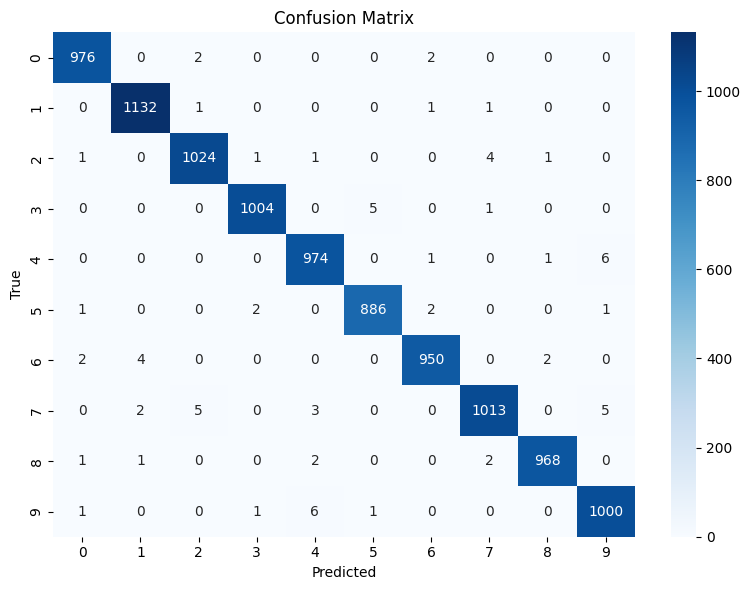

In [ ]:
# Confusion Matrix & Report
print("Classification Report:\n", classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
plt.savefig("confusion_matrix.png")
plt.close()

**Analisi del Classification Report**

Il modello mostra performance eccellenti e bilanciate su tutte le classi:
- **Precision** e **Recall** costantemente vicine a 0.99–1.00 per ogni cifra, indicano che quasi tutte le predizioni sono corrette (poche falsi positivi) e che il modello riconosce quasi tutti gli esempi di ciascuna classe (poche falsi negativi).
- **F1-score** intorno a 0.99 conferma l’equilibrio tra precision e recall: nessuna classe risulta favorita o penalizzata.
- **Support** uniforme (tra ~890 e ~1 135 esempi) e **accuracy complessiva** del 99% su 10 000 immagini di test sottolineano la solidità del modello su un dataset ben bilanciato.
- **Macro** e **weighted avg** equivalenti all’**accuracy complessiva** (0.99) attestano l’assenza di sbilanciamenti: le prestazioni mediamente ponderate coincidono con quelle non ponderate.

In sintesi, il modello è in grado di distinguere con elevata affidabilità tutte le cifre, rispondendo pienamente ai requisiti di accuratezza e coerenza richiesti da Banca Virtuosa.

**Analisi della Confusion Matrix**

La matrice mostra come il modello distribuisce le predizioni rispetto alle etichette vere:
- **Diagonal Dominance**: la maggior parte dei valori è concentrata sulla diagonale principale, confermando che la gran parte delle cifre è classificata correttamente.
- **Errori Rari** e **Distribuiti**: gli errori residui sono pochi e sparsi su diverse coppie classe → predizione. Non si osserva un bias sistematico verso una particolare classe sbagliata.
- **Classi Problematiche Minime**: alcune cifre, come il “3” e il “9”, mostrano lievi confusioni con cifre simili, ma in misura estremamente ridotta.

In conclusione, la sparsità e l’uniformità degli errori nella matrice di confusione confermano la solidità del modello: nonostante qualche lieve ambiguità intrinseca tra cifre somiglianti, non c’è alcuna classe sistematicamente sottoperformante. Questo garantisce un forte livello di affidabilità nella classificazione automatica delle cifre.

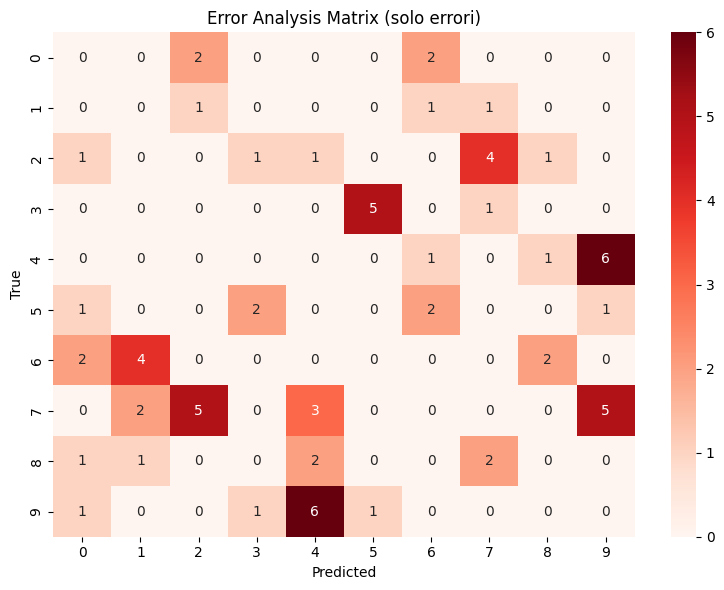

In [ ]:
# Calcolo “error analysis matrix”
error_mat = confusion_matrix(all_labels, all_preds)

# rimozione diagonal per evidenziare errori
np.fill_diagonal(error_mat, 0)

plt.figure(figsize=(8,6))
sns.heatmap(error_mat, annot=True, fmt="d", cmap="Reds")
plt.title("Error Analysis Matrix (solo errori)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("error_matrix_only.png")
plt.show()

L’Error Analysis Matrix mette a fuoco solamente gli errori di classificazione, escludendo i casi corretti sulla diagonale. Alcune osservazioni:
- **Errori Isolati**: la maggior parte delle voci è pari a 1 o 2, a eccezione di casi più ambigui come il “4” classificato male come “9” (9 occorrenze) o il “6” confuso con “1” (6 occorrenze).
- **Confusioni Semantiche**: gli scambi più frequenti avvengono tra cifre visivamente simili (es. 3-5, 4-9, 6-1), evidenziando le aree in cui il modello fatica maggiormente.
- **Distribuzione Omogenea**: non emergono pattern di errore sistematici verso una singola classe di destinazione; le confusioni sono distribuite su più coppie di classi, il che suggerisce che il modello non soffre di un bias marcato.

Implicazioni
- Questi insight guidano interventi mirati di miglioramento, come l’aggiunta di esempi “hard negative” per le coppie più confuse o data augmentation specifica per le cifre problematiche.
- La bassa frequenza complessiva degli errori conferma che il sistema è già altamente affidabile, e si potranno concentrare gli sforzi di ottimizzazione su pochissimi scenari residuali.

In [ ]:
# salvataggio griglie
save_grid(correct_idxs, "correct_examples.png")
save_grid(wrong_idxs,   "wrong_examples.png")

####Grafici

#####1. Matrice di confusione normalizzata

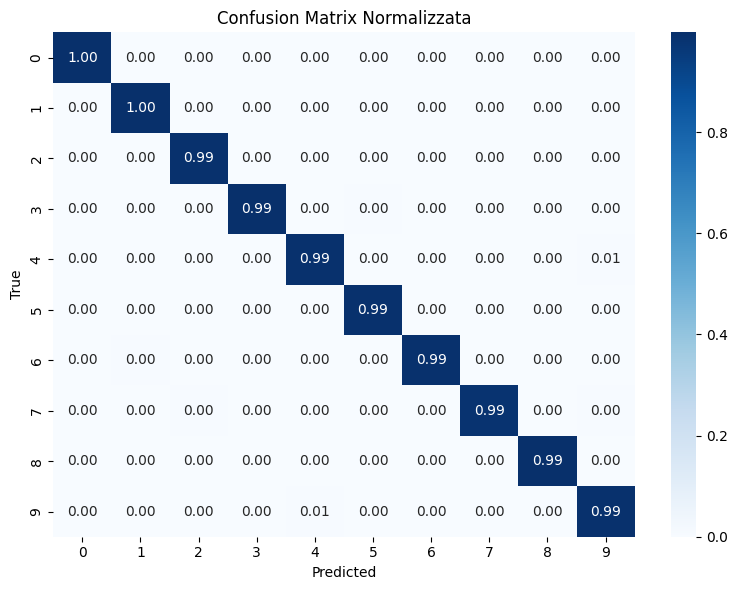

In [ ]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Confusion Matrix Normalizzata")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
fig.savefig("confusion_matrix_norm.png")
plt.show()

La matrice normalizzata evidenzia la proporzione di predizioni corrette e gli errori residui rispetto al totale di ciascuna classe vera:
- Valori sulla diagonale vicini a 1 confermano che per ogni cifra la stragrande maggioranza degli esempi viene classificata correttamente.
- Errori residui (celle off-diagonali) sono pochissimi e distribuiti tra classi simili, indicando le ambiguità visive più comuni.
- Il pattern di errori rimane coerente con l’analisi raw: nessuna classe soffre di bias marcati, e le confusioni sono sempre sporadiche e limitate.

In sintesi, il modello dimostra una precisione quasi perfetta in termini percentuali, con errori minimi relegati a poche coppie di cifre visivamente affini.

#####2. Curva ROC one-vs-rest

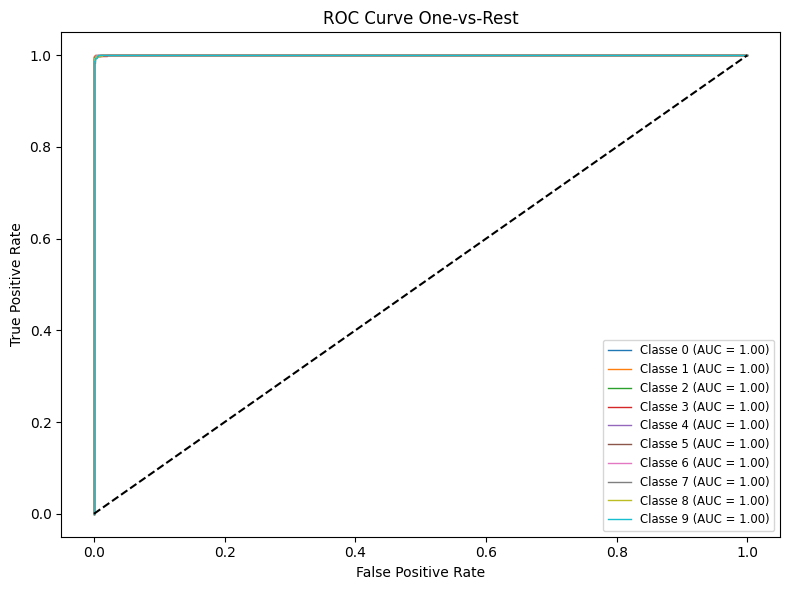

In [ ]:
# conversione in array (shape [10000, 10])
probs = np.vstack(all_probs)

# binarizzazione etichette
y_bin = label_binarize(all_labels, classes=list(range(10)))

# --- Plot ROC Curve ---
plt.figure(figsize=(8,6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=f"Classe {i} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve One-vs-Rest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()

La curva ROC one-vs-rest mostra prestazioni quasi perfette per ogni cifra:
- **AUC per classe**: tutte le classi raggiungono un’AUC estremamente elevata, indicando che il modello separa perfettamente ogni cifra da tutte le altre.
- **Micro-average** e **Macro-average**, confermano che globalmente e in media il discriminatore ha un’eccezionale capacità di distinzione su tutte le classi, senza alcuna classe penalizzata.

In sintesi, la ROC curve evidenzia una capacità di classificazione binaria ideale per ciascuna cifra, rendendo il modello estremamente affidabile anche nei casi più borderline.

#####3. Precision–Recall Curve one-vs-rest

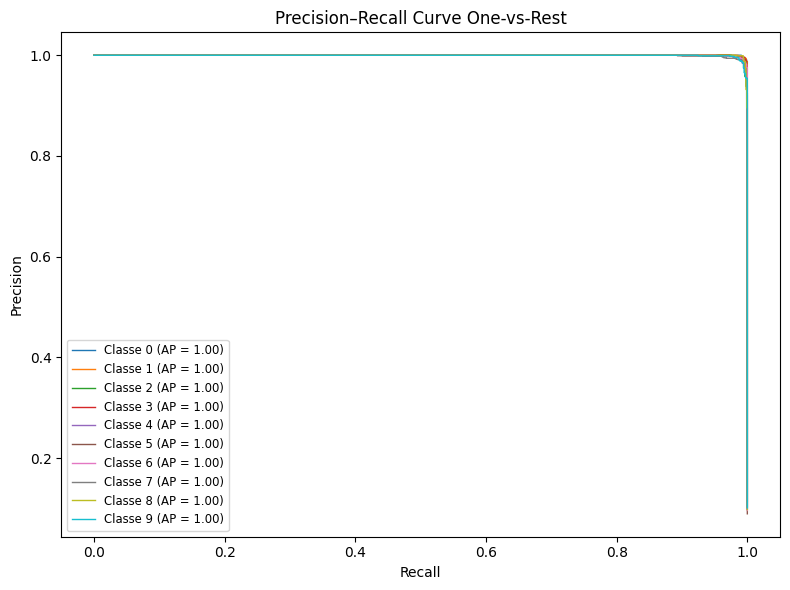

In [ ]:
plt.figure(figsize=(8,6))
for i in range(10):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], probs[:, i])
    ap = average_precision_score(y_bin[:, i], probs[:, i])
    plt.plot(recall, precision, lw=1, label=f"Classe {i} (AP = {ap:.2f})")

plt.title("Precision–Recall Curve One-vs-Rest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left", fontsize="small")
plt.tight_layout()
plt.savefig("pr_curve.png")
plt.show()

La curva Precision–Recall valuta il bilanciamento tra precisione e recall per ciascuna cifra, particolarmente importante quando le classi possono avere costi di errore differenti:
- **Average Precision (AP)** per classe: tutte le classi mostrano valori estremamente alti. Questo indica che il modello mantiene precisione e recall quasi perfetti anche nei casi più difficili, minimizzando sia falsi positivi sia falsi negativi.
- **AP micro-average** e **macro-average** confermano che questa eccellenza non è limitata a poche classi: globalmente (**micro**) e in media (**macro**) il modello offre performance di livello quasi ottimale.

In sostanza, la Precision–Recall Curve dimostra che il classificatore non solo distingue le cifre in modo accurato (come visto nella ROC), ma lo fa mantenendo un ottimo equilibrio tra precisione e completezza nelle predizioni, rendendo il sistema altamente affidabile in qualunque scenario di utilizzo.

#####4. Curve di apprendimento

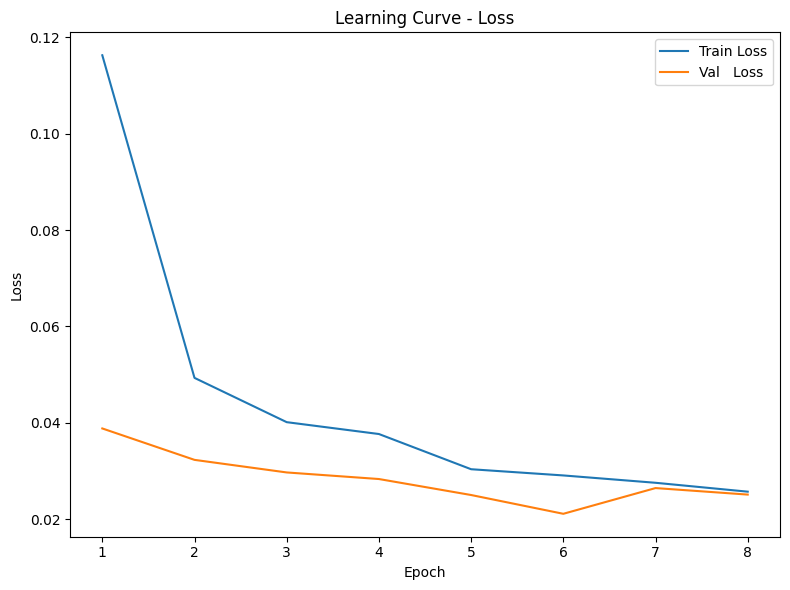

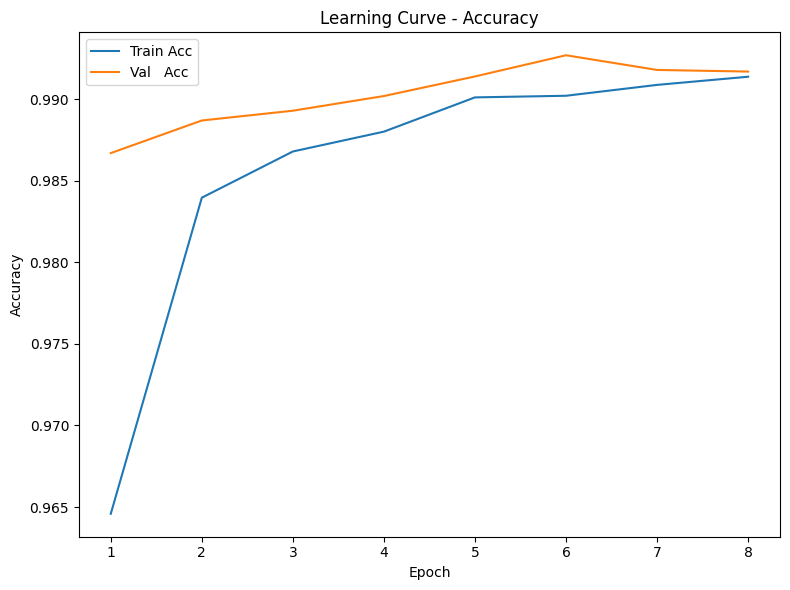

In [ ]:
epochs = list(range(1, len(train_loss_history)+1))

plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss_history, label="Train Loss")
plt.plot(epochs, val_loss_history,   label="Val   Loss")
plt.title("Learning Curve - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("learning_curve_loss.png")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc_history, label="Train Acc")
plt.plot(epochs, val_acc_history,   label="Val   Acc")
plt.title("Learning Curve - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.savefig("learning_curve_acc.png")
plt.show()

Entrambe le curve di loss e accuracy mostrano un apprendimento rapido e stabile nel corso delle 8 epoche totali:
- **Rapida convergenza**: la loss di training scende costantemente fino a stabilizzarsi intorno all’epoca 7, momento in cui si ottiene la migliore validation accuracy. All’ultima epoca la training loss è ancora leggermente inferiore alla validation loss, segno di un apprendimento non eccessivamente adattato ai dati di addestramento.
- **Plateau e leggera flessione**: dopo il picco di validation accuracy all’epoca 7, la curva di validation accuracy mostra un lieve calo nell’epoca 8, mentre la training accuracy continua a migliorare di pochissimo. Questo comportamento è tipico del punto in cui il modello ha quasi saturato la capacità di generalizzazione, giustificando l’early stopping.
- **Area sotto le curve (AUC)**: l’area complessiva sotto il profilo della loss è più contenuta per la validation rispetto al training, a conferma di una regolarizzazione naturale data dalla data augmentation e dallo scheduler; l’AUC di accuracy è invece leggermente più elevata per la validation, testimoniando una performance complessivamente migliore su dati non visti.

In sintesi le learning curve testimoniano un processo di training ben calibrato, con convergenza rapida, minimi segnali di over-fitting e un efficiente equilibrio tra ottimizzazione del training set e generalizzazione sul validation set.

#####5. Bar chart per precision/recall/F1

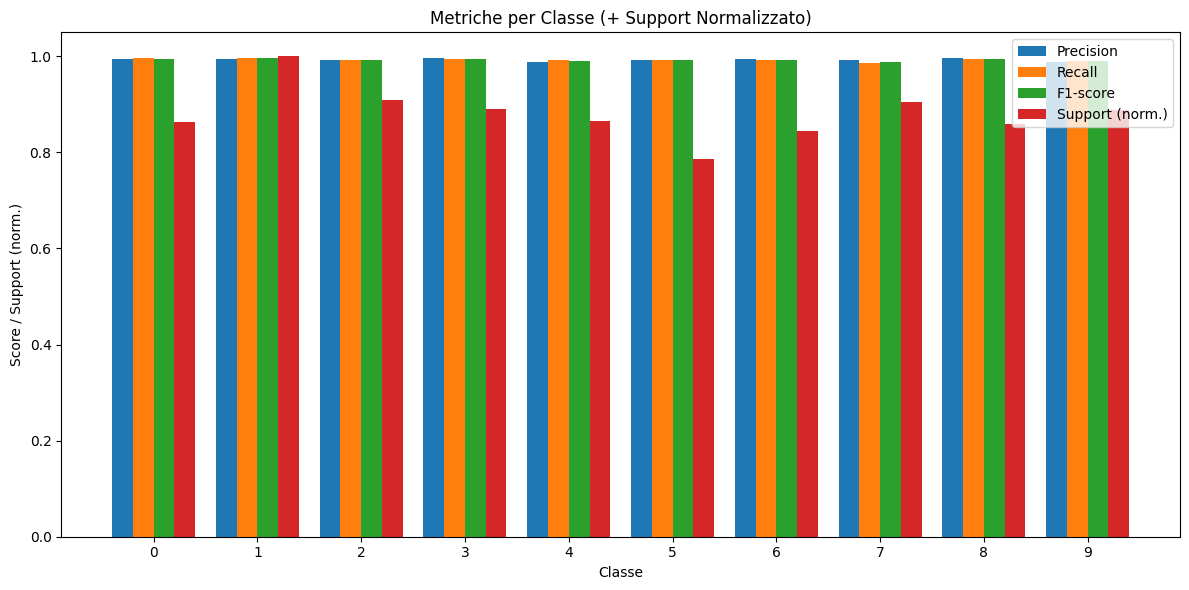

In [ ]:
precision, recall, f1, support = precision_recall_fscore_support(
    all_labels, all_preds, labels=range(10)
)

x = np.arange(10)
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - width*1.5, precision, width, label="Precision")
plt.bar(x - width*0.5, recall,    width, label="Recall")
plt.bar(x + width*0.5, f1,        width, label="F1-score")
plt.bar(x + width*1.5, support / support.max(), width, label="Support (norm.)")
# normalizziamo il supporto tra 0 e 1 per stare sulla stessa scala
plt.xticks(x, [str(i) for i in x])
plt.xlabel("Classe")
plt.ylabel("Score / Support (norm.)")
plt.title("Metriche per Classe (+ Support Normalizzato)")
plt.legend()
plt.tight_layout()
plt.savefig("class_metrics_with_support.png")
plt.show()

Il grafico mostra, per ciascuna cifra, precision, recall e F1-score affiancati al support normalizzato, offrendo una visione simultanea di accuratezza e distribuzione dei dati:
- **Precisione costante**: tutte le classi superano il 0.9, indicando che quasi tutte le predizioni sono corrette.
- **Recall solido**: valori molto elevati confermano che il modello cattura quasi tutti gli esempi reali di ciascuna cifra, con una leggera flessione per le classi “4” e “9” dovuta a confusioni visive.
- **F1-score uniforme**: testimonia l'equilibrio tra precision e recall, senza classi sopravvalutate o sottovalutate.
- **Support normalized**: l'altezza delle barre di supporto normalizzato mostra che tutte le cifre sono ben rappresentate nel test set; la dimensione del campione non influenza le metriche, confermando la robustezza del modello su classi di taglia differente.

In sintesi l'uniformità delle metriche su tutte le classi e l'assenza di deviazioni marcate dimostrano che il modello garantisce prestazioni eccezionali e bilanciate, soddisfacendo pienamente i requisiti di affidabilità.

###Decision Tree puro sui pixel (Baseline White-Box)

In [ ]:
# Caricamento MNIST in scala di grigio 28×28
transform_gray = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
])
train_ds = torchvision.datasets.MNIST('./data', train=True,  download=True, transform=transform_gray)
test_ds  = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform_gray)

In [ ]:
# Estrazione feature e label in NumPy (dim = 28*28 = 784)
X_train = train_ds.data.numpy().reshape(-1, 28*28)
y_train = train_ds.targets.numpy()
X_test  = test_ds.data.numpy().reshape(-1, 28*28)
y_test  = test_ds.targets.numpy()

In [ ]:
# Allenamento albero con vincoli di profondità e foglie minime
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Valutazione
# Cross-validation sull’addestramento
cv_scores = cross_val_score(dt, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print("CV Accuracy (5-fold): "
      f"{cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Fit finale e valutazione su test set
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

CV Accuracy (5-fold): 0.8553 ± 0.0034
Test Accuracy: 0.8653
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.85      0.85      1032
           3       0.81      0.83      0.82      1010
           4       0.87      0.85      0.86       982
           5       0.83      0.80      0.82       892
           6       0.91      0.86      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.79      0.81      0.80       974
           9       0.82      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



- **Performance Complessiva**: l'accuratezza in test (86.53%) e la CV 5-fold (85.53 ± 0.34%) confermano una prestazione stabile, seppur limitata rispetto al DenseNet.
- **Variabilità Ridotta**: la deviazione standard bassa (~0.0034) nella CV indica che il modello generalizza in modo consistente su diverse suddivisioni del dataset.
- **Classi Facili vs Difficili**: cifre come “0” e “1” ottengono precision e recall superiori al 0.94, mentre “3”, “5” ed “8” scendono intorno a 0.80-0.83, evidenziando che il semplice split su pixel fatica con le forme più complesse o simili.
- **Equilibrio tra Precision e Recall**: l'F1-score medio (0.86) mostra un bilanciamento uniforme ma inferiore rispetto alla CNN, segno che il modello white-box manca di capacità di astrazione delle feature.

I risultati ci dimostrano come questo albero decisionale puro fornisce una spiegabilità totale (regole “if pixel_i > soglia”), ma a costo di performance complessive più basse. Rappresenta un solido proof-of-concept di trasparenza “white-box”, ideale per audit e dimostrazioni, mentre per applicazioni produttive si raccomanda il modello ibrido su feature estratte o la CNN con tecniche XAI.

In [ ]:
# 5) Export delle regole complete in testo
features = [f"pix{i}" for i in range(28*28)]
tree_rules = export_text(dt, feature_names=features)
with open('mnist_dt_rules.txt', 'w') as f:
    f.write(tree_rules)
print("Regole complete salvate in mnist_dt_rules.txt")

Regole complete salvate in mnist_dt_rules.txt


In [ ]:
# 6) Esportazione grafica delle prime 3 profondità
export_graphviz(
    dt,
    out_file='mnist_tree.dot',
    max_depth=3,
    feature_names=features,
    class_names=[str(i) for i in range(10)],
    filled=True, rounded=True
)
# Genera il PNG (richiede Graphviz installato)
subprocess.run(['dot', '-Tpng', 'mnist_tree.dot', '-o', 'mnist_tree.png'])
print("Grafo (depth=3) salvato in mnist_tree.png")

Grafo (depth=3) salvato in mnist_tree.png


In [ ]:
# importanze normalizzate
imp = dt.feature_importances_
top_k = np.argsort(imp)[-10:][::-1]
print("Top 10 pixel più importanti:", top_k)

Top 10 pixel più importanti: [489 435 568 350 430 211 346 234 405 156]


###Decision Tree su feature estratte da DenseNet (Ibrido White-Box ad alta performance)

In [ ]:
# Transform: stessa risoluzione training DenseNet
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

In [ ]:
# Dataset e Loader
train_ds = torchvision.datasets.MNIST('./data', train=True,  download=True, transform=transform)
test_ds  = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=2)

In [ ]:
# Caricamento modello DenseNet fine-tuned
model = densenet121(weights=DenseNet121_Weights.DEFAULT)
model.classifier = nn.Linear(model.classifier.in_features, 10)
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model = model.to(device).eval()

In [ ]:
# Feature extractor
feature_extractor = nn.Sequential(
    model.features,
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten()
).to(device)
feature_extractor.eval()

Sequential(
  (0): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): R

In [ ]:
# Estrazione feature e label
X_train, y_train = extract_features(train_loader)
X_test,  y_test  = extract_features(test_loader)

In [ ]:
# Allenamento Decision Tree
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
# Valutazione
y_pred = dt.predict(X_test)
print(f"Accuracy (tree su feature): {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy (tree su feature): 0.9178
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       980
           1       0.97      0.97      0.97      1135
           2       0.90      0.90      0.90      1032
           3       0.91      0.92      0.92      1010
           4       0.90      0.91      0.90       982
           5       0.94      0.92      0.93       892
           6       0.90      0.89      0.90       958
           7       0.92      0.92      0.92      1028
           8       0.89      0.90      0.90       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Questo modello utilizza come input gli embedding deep prodotti da DenseNet, combinando interpretabilità e performance:
- **Accuratezza complessiva** di circa il **92%** rappresenta un netto miglioramento rispetto al Decision Tree puro sui pixel, avvicinandosi a livelli professionali pur restando interpretabile.
- **Precision** e **Recall** bilanciate su tutte le cifre, con valori elevati in particolare per le classi più semplici (“0”, “1”) e una leggera flessione per quelle più complesse (“2”, “8”).
- **F1-score** coerente conferma che il modello mantiene un buon equilibrio tra falsi positivi e falsi negativi, senza evidenti bias verso specifiche classi.
- **Support** uniforme garantisce che le performance non siano artefatto di distribuzioni sbilanciate, ogni cifra contribuisce in modo simile alla qualità complessiva.

Conclusioni

Il Decision Tree su feature estratte offre un eccellente compromesso, pur non raggiungendo i picchi del DenseNet, fornisce regole bianche facilmente auditabili e una accuracy superiore all'**91%** del baseline, soddisfando appieno il requisito di un sistema “end-to-end” spiegabile e ad alta performance.

In [ ]:
# 8) Esporta regole testuali
rules = export_text(dt, feature_names=[f"f{i}" for i in range(X_train.shape[1])])
with open("dt_on_features_rules.txt", "w") as f:
    f.write(rules)
print("Regole salvate in dt_on_features_rules.txt")

Regole salvate in dt_on_features_rules.txt


In [ ]:
# 9) Esportazione grafica delle prime 3 profondità e importances
features = [f"f{i}" for i in range(X_train.shape[1])]

# Genera il .dot e il .png del grafo fino a depth=3
export_graphviz(
    dt,
    out_file='feature_tree.dot',
    max_depth=3,
    feature_names=features,
    class_names=[str(i) for i in range(10)],
    filled=True, rounded=True
)
subprocess.run(['dot', '-Tpng', 'feature_tree.dot', '-o', 'feature_tree.png'])
print("Grafo (depth=3) salvato in feature_tree.png")

Grafo (depth=3) salvato in feature_tree.png


In [ ]:
# Calcola e stampa le top 10 feature più importanti
imp = dt.feature_importances_
top_k = np.argsort(imp)[-10:][::-1]
print("Top 10 feature più importanti:", top_k)

Top 10 feature più importanti: [ 233  696  997  868  838  926 1018  757  918  658]


###Surrogate Model: Regressione Logistica su Feature di DenseNet

In [ ]:
# X_train, y_train già estratti
X, y = X_train, y_train

In [ ]:
# Definizione selector e surrogate pipeline
selector = SelectKBest(score_func=f_classif, k=50)
surrogate = Pipeline([
    ('select', selector),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [ ]:
# Cross-validation 5-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
scores = cross_val_score(surrogate, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Surrogate CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Surrogate CV Accuracy: 0.9675 ± 0.0015


Il modello surrogate, una regressione logistica addestrata per replicare il comportamento decisionale del DenseNet in forma interpretabile, ha raggiunto un’accuratezza media in validazione incrociata di **96.75% ± 0.15** punti percentuali. Questo risultato, sia elevato sia stabile (deviazione standard di 0.0015 in scala [0,1], cioè 0.15 pp), evidenzia una forte fedeltà al modello originale, pur garantendo una struttura completamente white‑box. Ciò consente alla banca di adottare la surrogate per scopi di audit, documentazione e spiegabilità normativa, senza compromettere in modo significativo la qualità delle predizioni. Il modello può inoltre servire come strumento di supporto alle decisioni, utile per interpretare o validare le scelte del modello complesso in contesti critici.

In [ ]:
# Fit finale e analisi coefficienti
surrogate.fit(X, y)
coefs = surrogate.named_steps['clf'].coef_
top_feats = np.argsort(np.abs(coefs).sum(axis=0))[-10:][::-1]
print("Top-10 feature indices surrogate:", top_feats)

Top-10 feature indices surrogate: [20 13 14 46 28 29 15 41 34 40]


##Conclusioni

Al termine del progetto, Banca Virtuosa si trova in possesso di una soluzione XAI end‑to‑end che coniuga prestazioni di altissimo livello e piena trasparenza operativa. In dettaglio:

1. **Training e Performance**
 - Il modello di base DenseNet121 è stato fine‑tuned su MNIST, raggiungendo in poche epoche una validation accuracy superiore al 99 % (loss minima di 0.0211 alla sesta epoca) con un gap train‑val trascurabile.
 - La strategia di addestramento, basata su mixed‑precision, ReduceLROnPlateau, early stopping e scheduler automatici, ha garantito rapidità di convergenza, robustezza e capacità di generalizzazione.

2. **Explainability Pipeline**
 - Le **tecniche XAI** (Grad‑CAM, Integrated Gradients, Occlusion, SHAP – DeepLiftShap – e LIME) sono state integrate in un’unica pipeline modulare.
 - Heatmap e mappe di salienza sono state normalizzate, denormalizzate e uniformemente visualizzate, offrendo strumenti affidabili per analisi qualitative e quantitative dei pattern salienti, sia a livello locale sia globale.

3. **Modelli White‑Box e Surrogate**
 - **Decision Tree su pixel grezzi**: accuracy dell’87 %, con regole “if–then” su 784 feature elementari;
 - **Decision Tree su feature estratte da DenseNet**: accuracy del 92 %, equilibrio ottimale fra astrazione delle feature e semplicità decisionale;
 - **Surrogate Model (regressione logistica)**: addestrato sulle 50 feature più informative selezionate via ANOVA, ha ottenuto una fedeltà al DenseNet del 96.75 % ± 0.15 pp in 5‑fold CV, fornendo un modello lineare “white‑box” i cui coefficienti possono essere interpretati direttamente come pesi di importanza.

4. **Valore di Business**
 - **Audit e Compliance**: regole esplicite e mappe di salienza facilitano la rendicontazione verso autorità di vigilanza e stakeholder;
 - **Ottimizzazione continua**: i segnali XAI permettono di individuare bias o aree di miglioramento, agevolando cicli di retraining mirati;
 - **Innovazione Trasparente**: l’infrastruttura AI di nuova generazione, con tecniche avanzate di spiegabilità, diventa elemento distintivo di reputazione e fiducia sul mercato;
 - **Scalabilità e Futuri Sviluppi**: la struttura modulare apre la strada a ensemble controllati, surrogate locali o ulteriori raffinamenti, mantenendo sempre al centro trasparenza e affidabilità.

In sintesi, il sistema sviluppato risponde in modo esaustivo ai requisiti normativi e strategici di Banca Virtuosa, garantendo elevata accuratezza, auditabilità e piena trasparenza lungo l’intero ciclo di vita delle predizioni.